In [ ]:
# Exploratory Data Analysis on Diwali Sales Dataset
This project analyzes customer purchasing behavior during Diwali using Python.


In [3]:
!pip install pandas numpy matplotlib seaborn  

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("diwali_sales.csv", encoding='unicode_escape')
df.head(10)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [ ]:
## Business Questions

- Which gender spends more?
- Which age group spends the most?
- Which state has highest sales?
- Which product category is most sold?
- Does marital status affect spending?
- Which occupation spends the most?


In [11]:
df.shape
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  str    
 2   Product_ID        11251 non-null  str    
 3   Gender            11251 non-null  str    
 4   Age Group         11251 non-null  str    
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  str    
 8   Zone              11251 non-null  str    
 9   Occupation        11251 non-null  str    
 10  Product_Category  11251 non-null  str    
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), str(8)
memory usage: 1.3 MB


,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [12]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True, errors='ignore')


In [13]:
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  str    
 2   Product_ID        11251 non-null  str    
 3   Gender            11251 non-null  str    
 4   Age Group         11251 non-null  str    
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  str    
 8   Zone              11251 non-null  str    
 9   Occupation        11251 non-null  str    
 10  Product_Category  11251 non-null  str    
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), str(8)
memory usage: 1.1 MB


,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df.isnull().sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
df.dropna(inplace=True)


In [16]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
df['Amount'] = df['Amount'].astype('int')


In [18]:
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   User_ID           11239 non-null  int64
 1   Cust_name         11239 non-null  str  
 2   Product_ID        11239 non-null  str  
 3   Gender            11239 non-null  str  
 4   Age Group         11239 non-null  str  
 5   Age               11239 non-null  int64
 6   Marital_Status    11239 non-null  int64
 7   State             11239 non-null  str  
 8   Zone              11239 non-null  str  
 9   Occupation        11239 non-null  str  
 10  Product_Category  11239 non-null  str  
 11  Orders            11239 non-null  int64
 12  Amount            11239 non-null  int64
dtypes: int64(5), str(8)
memory usage: 1.2 MB


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df.drop_duplicates(inplace=True)


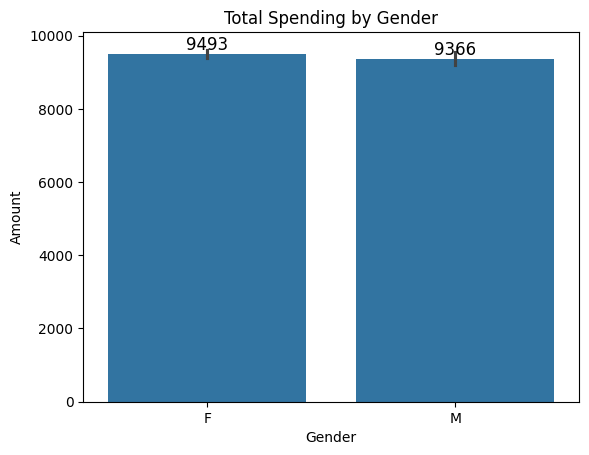

In [30]:
ax = sns.barplot(x='Gender', y='Amount', data=df)

plt.title("Total Spending by Gender")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',   # value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # position
                ha='center', va='bottom',
                fontsize=12, color='black')

plt.show()


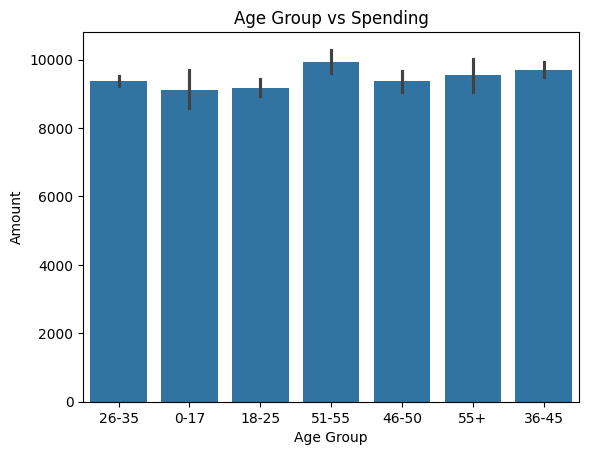

In [21]:
sns.barplot(x='Age Group', y='Amount', data=df)
plt.title("Age Group vs Spending")
plt.show()


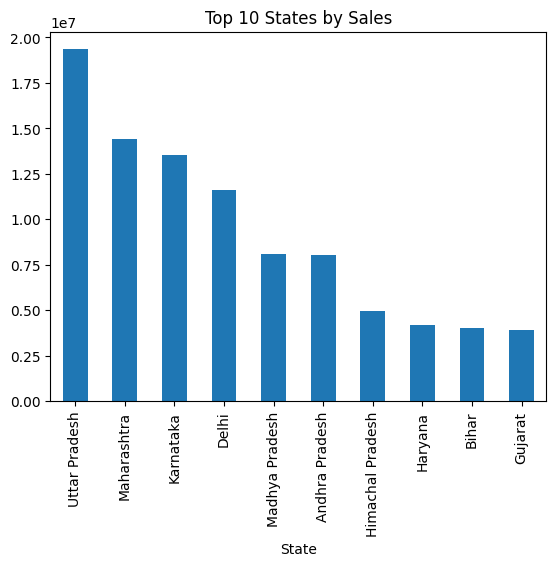

In [22]:
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', title="Top 10 States by Sales")
plt.show()


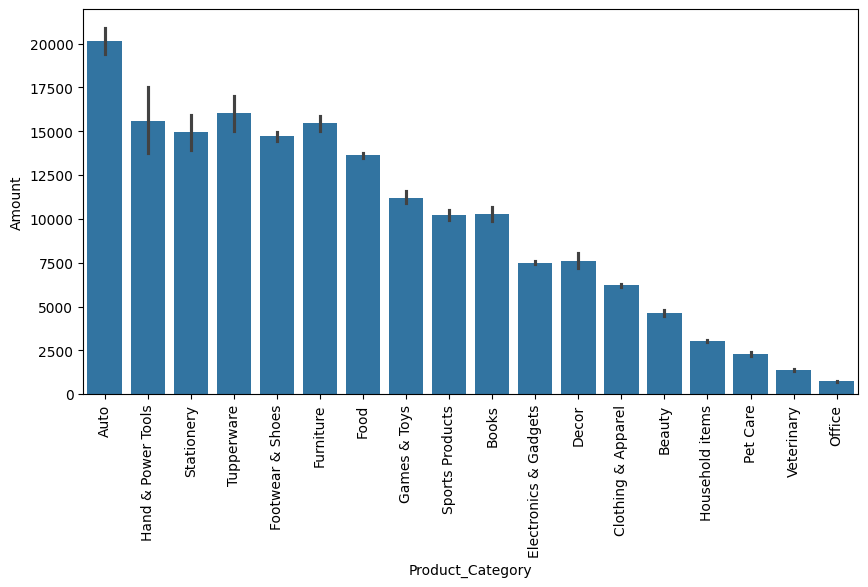

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()


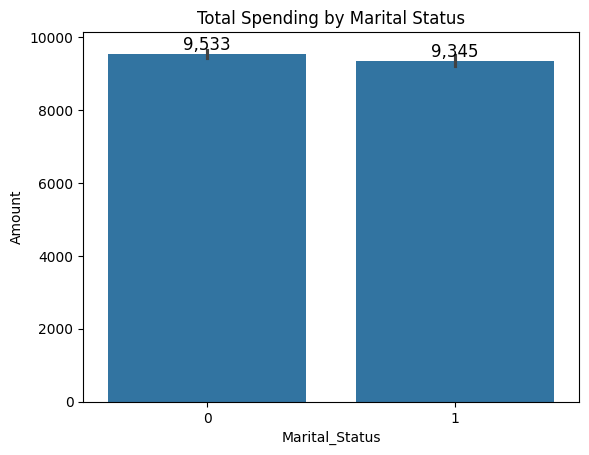

In [33]:
ax = sns.barplot(x='Marital_Status', y='Amount', data=df)

plt.title("Total Spending by Marital Status")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black')

plt.show()


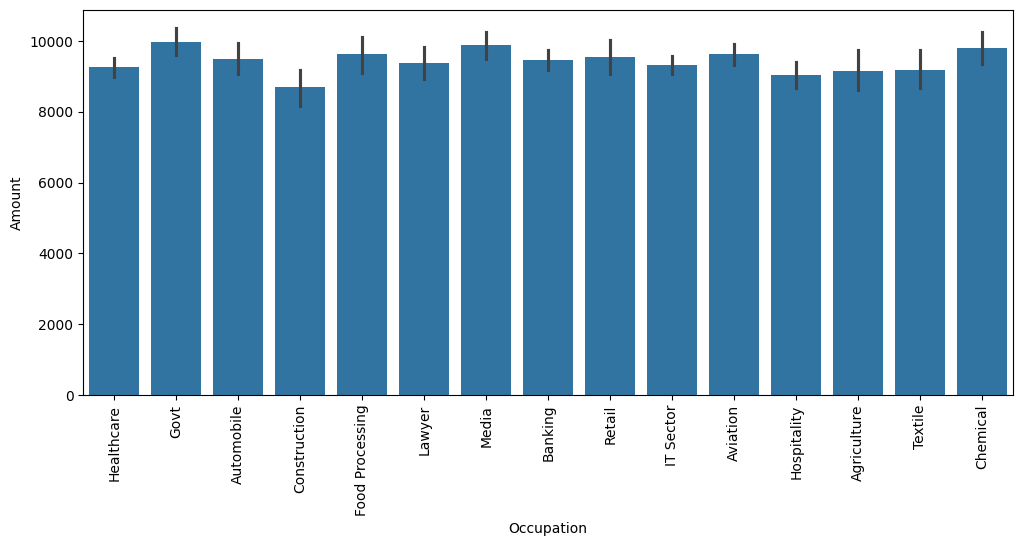

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='Occupation', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
## Issues Identified

- Missing values
- Unnecessary columns
- Duplicate records
- Wrong data types

## Problems These Cause

- Incorrect sales calculation
- Misleading insights


In [ ]:
## Key Insights

- Females spend more than males
- Age group 26–35 spends the most
- Top states contribute maximum sales
- Food and Clothing are popular categories
- Married and IT professionals are major buyers


In [34]:
df.to_csv("cleaned_diwali.csv", index=False)
